# Lab 3: Interpolation and Quadrature
Kabilan Sriranjan

13/04/18

In [1]:
import math
import time
import random as rn
import numpy as np
import matplotlib.pyplot as plt

## Question 1.

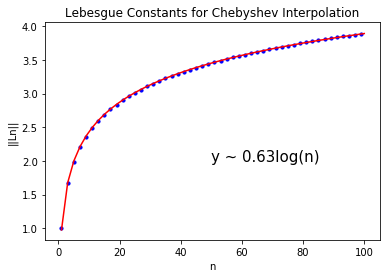

In [92]:
def chebyNodes(n):
    k = np.array(range(1,n+1))
    return np.cos((2*k-1)*np.pi/(2*n))[::-1]

def phi(k, x, nodes):
    x_k = nodes[k]
    product = 1
    for x_i in nodes:
        if x_i != x_k:
            product = product * (x-x_i)/(x_k-x_i)
    return product
    
def L(n):
    nodes = chebyNodes(n)
    leb = 0;
    for i in range(n):
        leb = leb + np.abs(phi(i, 1, nodes))
    return leb
    
n = range(1, 100)[::2]
Ls = []
for i in n:
    Ls.append(L(i))

fit = np.polyfit(np.log(n), Ls, deg=1)
x = np.linspace(1,100, 50)
y = fit[1] + fit[0]*np.log(x)
plt.plot(x, y, color="red")
plt.scatter(n, Ls, color="blue", s=10)
plt.text(50,2,"y ~ "+str(round(fit[0], 2))+"log(n)", fontsize=15)
plt.title("Lebesgue Constants for Chebyshev Interpolation")
plt.xlabel("n")
plt.ylabel("||Ln||")
plt.show()